In [ ]:
# https://github.com/mikekeith52/scalecast-examples/blob/main/multivariate/multivariate.ipynb

In [1]:
!pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.2/697.2 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 6.6 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.17.2-py3-none-any.whl size=110630 sha256=664dabfcaac7ef30406490eea3eb0a9c0f04d9b4acd8d3fd2936bdd379673c24
  Stored in directory: /root/.cache/pip/wheels/69/cc/bd/0086e3ad5b852d16a8171b6766edea88b911d226614c6c5ca6
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=07597c8891943f74e615ec0c02a85ce839bf93ce8d4148a8e85853256fa9b695
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator
import random

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [64]:
np.random.seed(10)
random.seed(10)
scaler = MinMaxScaler()

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [60]:
pathfile = []
for i in range(3):
  pathfile.append(r'/content/gdrive/MyDrive/dsls_ds_mini_project/sample_jams_{}_clean.csv'.format(i))

## Street 0

In [101]:
# read file
df_jams_sample = pd.read_csv(pathfile[0])

In [102]:
df_jams_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1458 non-null   object 
 1   median_length     1458 non-null   float64
 2   median_delay      1458 non-null   float64
 3   median_speed_kmh  1458 non-null   float64
 4   median_level      1458 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.1+ KB


In [103]:
df_jams_sample.head()

,time,median_length,median_delay,median_speed_kmh,median_level
0,2022-07-06 06:00:00,219.00,73.500,6.1225,4.0
1,2022-07-06 07:00:00,867.75,121.875,14.7800,2.0
2,2022-07-06 08:00:00,849.00,111.250,18.3950,2.0
3,2022-07-06 09:00:00,1076.00,159.125,17.7400,2.0
4,2022-07-06 10:00:00,1024.50,156.000,17.8150,2.0


In [65]:
# normalisasi
# df_jams_sample[df_jams_sample.columns[1:4]] = scaler.fit_transform(df_jams_sample[df_jams_sample.columns[1:4]])
# hasil jika menggunakan normalisasi menjadi buruk, jadi tinggalkan

In [104]:
df_jams_sample.head()

,time,median_length,median_delay,median_speed_kmh,median_level
0,2022-07-06 06:00:00,219.00,73.500,6.1225,4.0
1,2022-07-06 07:00:00,867.75,121.875,14.7800,2.0
2,2022-07-06 08:00:00,849.00,111.250,18.3950,2.0
3,2022-07-06 09:00:00,1076.00,159.125,17.7400,2.0
4,2022-07-06 10:00:00,1024.50,156.000,17.8150,2.0


In [67]:
# scaler.inverse_transform([[0.020192, 0.055790, 0.077079],	[0.394457, 0.255702, 0.449512],	[0.383640, 0.211794, 0.605024]])

In [105]:
# membuat frekuensi waktu berdasarkan 1 jam
df_jams_sample['time'] = pd.to_datetime(df_jams_sample['time'])
df_jams_sample = df_jams_sample.set_index('time').asfreq('1H')
df_jams_sample = df_jams_sample.sort_values(['time'])
df_jams_sample.head(3)

,median_length,median_delay,median_speed_kmh,median_level
time,,,,
2022-07-06 06:00:00,219.00,73.500,6.1225,4.0
2022-07-06 07:00:00,867.75,121.875,14.7800,2.0
2022-07-06 08:00:00,849.00,111.250,18.3950,2.0


In [ ]:
# df_jams_sample['median_level'] = df_jams_sample['median_level'].astype('category')

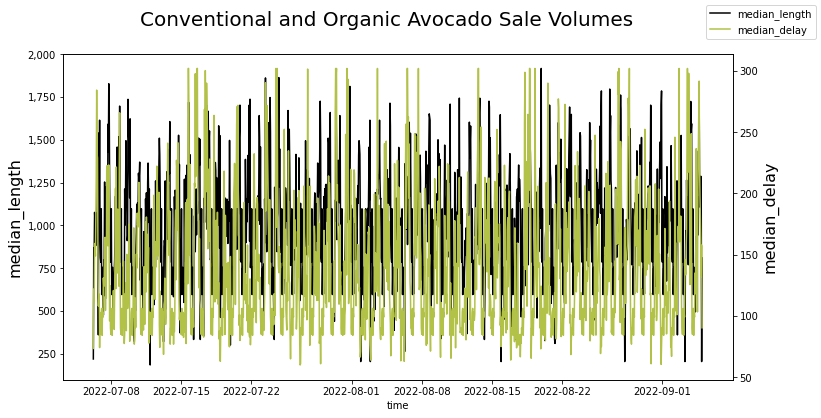

In [106]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='time',y='median_length',data=df_jams_sample,label='median_length',ax=ax,color='black',legend=False)
plt.ylabel('median_length',size=16)
ax2 = ax.twinx()
sns.lineplot(x='time',y='median_delay',data=df_jams_sample,label='median_delay',ax=ax2,color='#B2C248',legend=False)
ax.figure.legend()
plt.ylabel('median_delay',size=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Conventional and Organic Avocado Sale Volumes',size=20)
plt.show()

In [107]:
# pilih model
models = ('mlr','elasticnet','knn','rf','gbt','xgboost','mlp')
GridGenerator.get_example_grids()
GridGenerator.get_mv_grids()

### Length prep

In [108]:
# mendaftarkan kolom length
flength = Forecaster(y=df_jams_sample['median_length'],current_dates = df_jams_sample.index)
flength

Forecaster(
    DateStartActuals=2022-07-06T06:00:00.000000000
    DateEndActuals=2022-09-04T23:00:00.000000000
    Freq=H
    N_actuals=1458
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
)

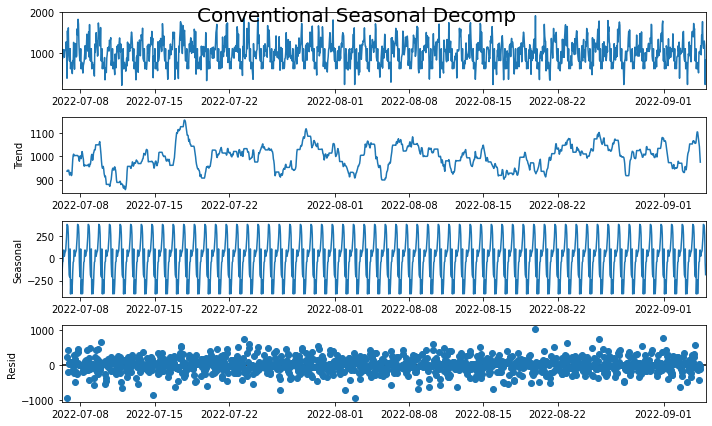

In [109]:
plt.rc("figure",figsize=(10,6))
flength.seasonal_decompose().plot()
plt.suptitle('Conventional Seasonal Decomp',size=20)
plt.show()

### Delay prep

In [110]:
# mendaftarkan kolom delay
fdelay = Forecaster(y=df_jams_sample['median_delay'],current_dates = df_jams_sample.index)
fdelay

Forecaster(
    DateStartActuals=2022-07-06T06:00:00.000000000
    DateEndActuals=2022-09-04T23:00:00.000000000
    Freq=H
    N_actuals=1458
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
)

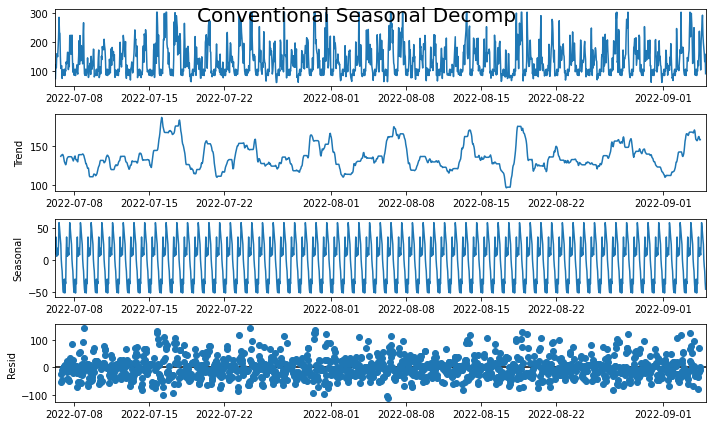

In [111]:
plt.rc("figure",figsize=(10,6))
fdelay.seasonal_decompose().plot()
plt.suptitle('Conventional Seasonal Decomp',size=20)
plt.show()

### Speed prep

In [112]:
# mendaftarkan kolom speed
fspeed = Forecaster(y=df_jams_sample['median_speed_kmh'],current_dates = df_jams_sample.index)
fspeed

Forecaster(
    DateStartActuals=2022-07-06T06:00:00.000000000
    DateEndActuals=2022-09-04T23:00:00.000000000
    Freq=H
    N_actuals=1458
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
)

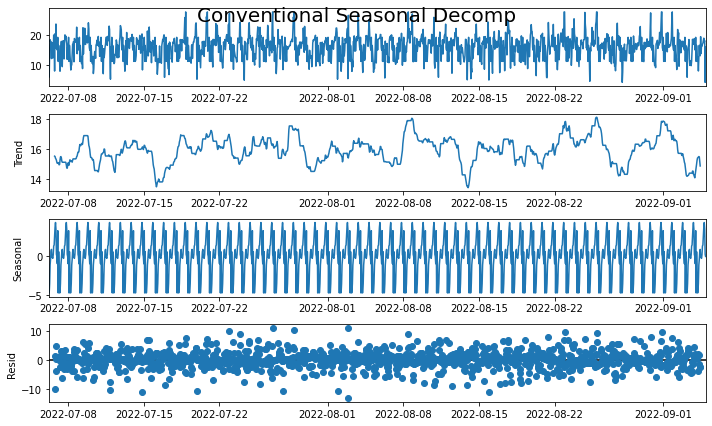

In [113]:
plt.rc("figure",figsize=(10,6))
fspeed.seasonal_decompose().plot()
plt.suptitle('Conventional Seasonal Decomp',size=20)
plt.show()

### Multivariate

In [114]:
# setting model
for f in (flength,fdelay, fspeed):
    f.generate_future_dates(7*24)
    f.set_test_length(.2)
    f.set_validation_length(4)
    f.add_seasonal_regressors('hour')
    f.add_time_trend()
    f.add_cycle(26)
    f.add_ar_terms(3)

In [115]:
# Set MV Parameter
mvf = MVForecaster(flength,fdelay,fspeed,names=['Length','Delay', 'Speed']) # init the mvf object
mvf.set_test_length(.2)
mvf.set_validation_length(4)
mvf

MVForecaster(
    DateStartActuals=2022-07-06T06:00:00.000000000
    DateEndActuals=2022-09-04T23:00:00.000000000
    Freq=H
    N_actuals=1458
    N_series=3
    SeriesNames=['Length', 'Delay', 'Speed']
    ForecastLength=168
    Xvars=['hour', 't', 'cycle26sin', 'cycle26cos']
    TestLength=291
    ValidationLength=4
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    OptimizeOn=mean
    GridsFile=MVGrids
)

In [116]:
# korelasi
mvf.corr()

,Length,Delay,Speed
Length,1.000000,0.348716,0.714524
Delay,0.348716,1.000000,-0.181013
Speed,0.714524,-0.181013,1.000000


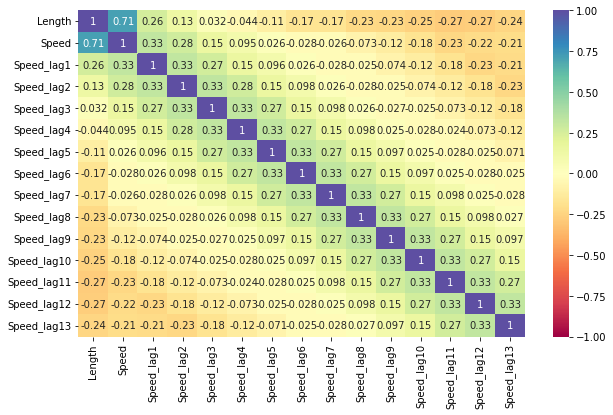

In [117]:
mvf.corr_lags(
    y='Length',
    x='Speed',
    lags=13,
    disp='heatmap',
    annot=True,
    vmin=-1,
    vmax=1,
    cmap = 'Spectral',
)
plt.show()

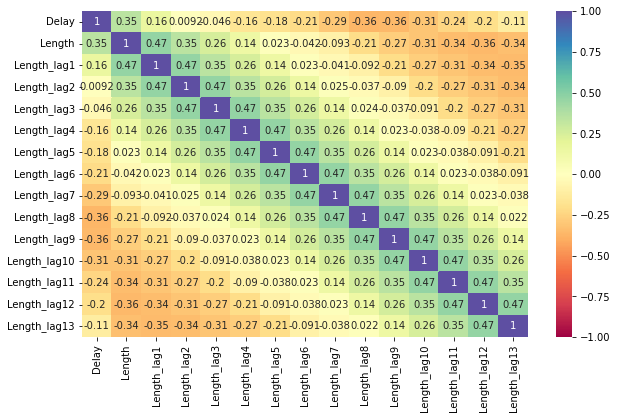

In [118]:
mvf.corr_lags(
    y='Delay',
    x='Length',
    lags=13,
    disp='heatmap',
    annot=True,
    vmin=-1,
    vmax=1,
    cmap = 'Spectral',
)
plt.show()

In [119]:
# jika ingin fokus ke satu kolom
# mvf.set_optimize_on('Length')
# jika ingin pake weight
# mvf.add_optimizer_func(lambda x: x[0]*.25 + x[1]*.75,'weighted')
# mvf.set_optimize_on('weighted')
# jika fokus ke semua kolom
mvf.set_optimize_on('mean')

In [120]:
mvf.tune_test_forecast(models)
mvf.set_best_model(determine_best_by='LevelTestSetMAPE')

[13:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence interval

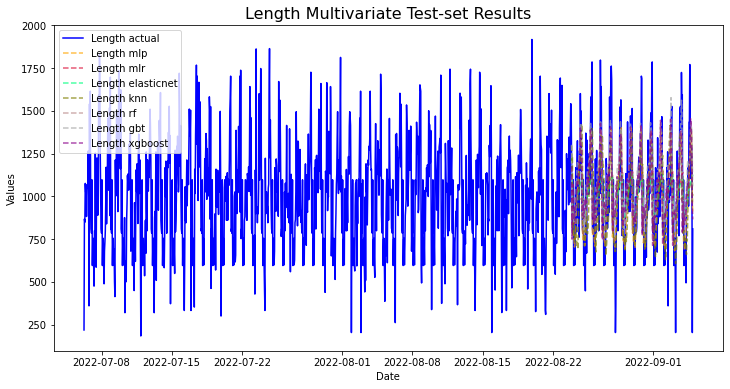

In [121]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='Length',put_best_on_top=True,ci=True)
plt.title('Length Multivariate Test-set Results',size=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence interval

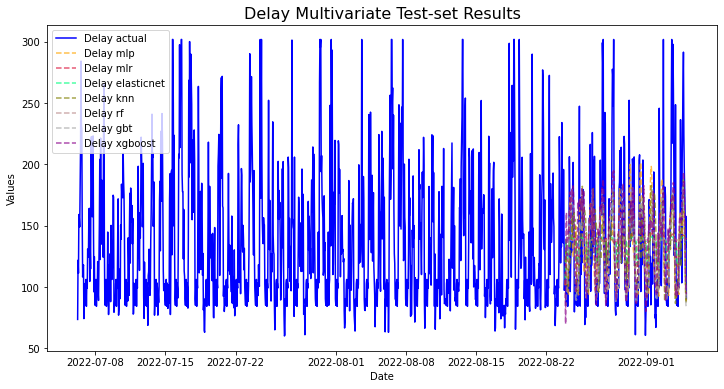

In [122]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='Delay',put_best_on_top=True,ci=True)
plt.title('Delay Multivariate Test-set Results',size=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence interval

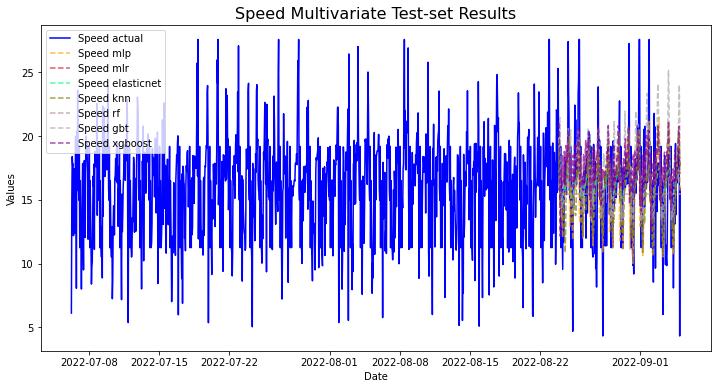

In [123]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='Speed',put_best_on_top=True,ci=True)
plt.title('Speed Multivariate Test-set Results',size=16)
plt.show()

In [124]:
pd.options.display.max_colwidth = 100
results = mvf.export('model_summaries')
results[
    [
        'ModelNickname',
        'Series',
        'HyperParams',
        'LevelTestSetMAPE',
        'LevelTestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'Lags'
    ]
]

,ModelNickname,Series,HyperParams,LevelTestSetMAPE,LevelTestSetR2,InSampleMAPE,InSampleR2,Lags
0,mlp,Length,"{'activation': 'relu', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs'}",0.197477,0.437342,0.224702,0.367126,1
1,mlr,Length,{},0.250753,0.256017,0.231064,0.349894,6
2,elasticnet,Length,"{'alpha': 2, 'l1_ratio': 0}",0.254571,0.238617,0.231190,0.348163,6
3,knn,Length,{'n_neighbors': 13},0.229182,0.296526,0.200522,0.462050,6
4,rf,Length,"{'max_depth': 5, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 1}",0.287676,-0.009005,0.306093,-0.001725,3
5,gbt,Length,"{'max_depth': 2, 'max_features': None}",0.241153,0.390190,0.161473,0.607958,1
6,xgboost,Length,"{'n_estimators': 150, 'scale_pos_weight': 5, 'learning_rate': 0.1, 'gamma': 5, 'subsample': 0.9}",0.239932,0.365342,0.119299,0.781707,6
7,mlp,Delay,"{'activation': 'relu', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs'}",0.233513,0.146034,0.200006,0.514481,1
8,mlr,Delay,{},0.278598,0.100783,0.223399,0.437625,6
9,elasticnet,Delay,"{'alpha': 2, 'l1_ratio': 0}",0.282280,0.091634,0.223019,0.436569,6


In [126]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
estimators = [
    ('mlr',LinearRegression()),
    ('elasticnet',ElasticNet(**results.loc[results['ModelNickname'] == 'elasticnet','HyperParams'].values[0])),
    ('mlp',MLPRegressor(**results.loc[results['ModelNickname'] == 'mlp','HyperParams'].values[0]))
]

final_estimator = KNeighborsRegressor(**results.loc[results['ModelNickname'] == 'knn','HyperParams'].values[0])

In [127]:
mvf.add_sklearn_estimator(StackingRegressor,'stacking')
mvf.set_estimator('stacking')
mvf.manual_forecast(estimators=estimators,final_estimator=final_estimator,lags=13)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence interval

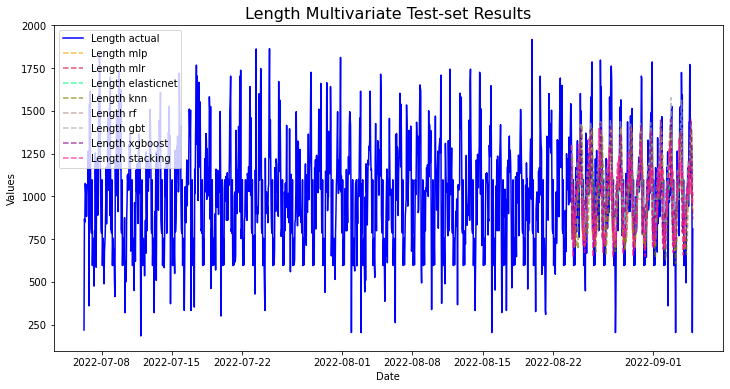

In [128]:
mvf.plot_test_set(series='Length',put_best_on_top=True,ci=True)
plt.title('Length Multivariate Test-set Results',size=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence interval

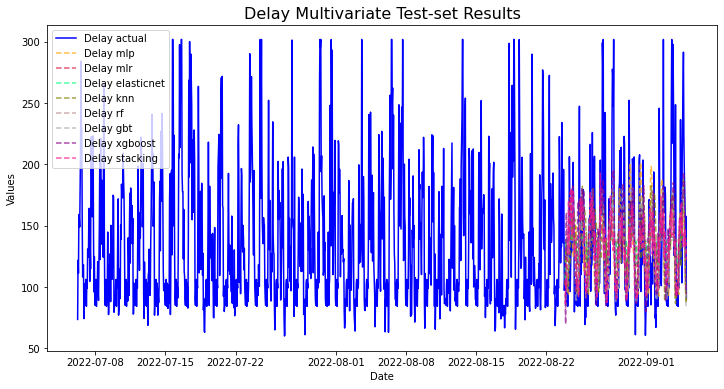

In [129]:
mvf.plot_test_set(series='Delay',put_best_on_top=True,ci=True)
plt.title('Delay Multivariate Test-set Results',size=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence interval

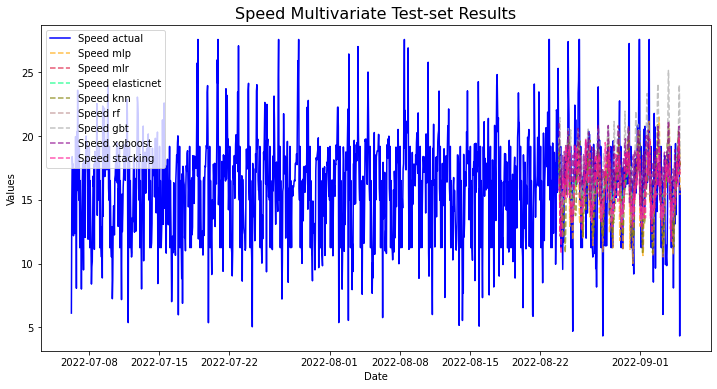

In [130]:
mvf.plot_test_set(series='Speed',put_best_on_top=True,ci=True)
plt.title('Speed Multivariate Test-set Results',size=16)
plt.show()

In [131]:
mvf.set_best_model(determine_best_by='LevelTestSetMAPE')
results2 = mvf.export('model_summaries')
results2[
    [
        'ModelNickname',
        'Series',
        'LevelTestSetMAPE',
        'LevelTestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'Lags',
        'best_model'
    ]
]

,ModelNickname,Series,LevelTestSetMAPE,LevelTestSetR2,InSampleMAPE,InSampleR2,Lags,best_model
0,mlp,Length,0.197477,0.437342,0.224702,0.367126,1,True
1,mlr,Length,0.250753,0.256017,0.231064,0.349894,6,False
2,elasticnet,Length,0.254571,0.238617,0.231190,0.348163,6,False
3,knn,Length,0.229182,0.296526,0.200522,0.462050,6,False
4,rf,Length,0.287676,-0.009005,0.306093,-0.001725,3,False
5,gbt,Length,0.241153,0.390190,0.161473,0.607958,1,False
6,xgboost,Length,0.239932,0.365342,0.119299,0.781707,6,False
7,stacking,Length,0.235688,0.222578,0.208020,0.434381,13,False
8,mlp,Delay,0.233513,0.146034,0.200006,0.514481,1,True
9,mlr,Delay,0.278598,0.100783,0.223399,0.437625,6,False


In [132]:
print('-'*100)
for series in results2['Series'].unique():
    print('multivariate average test MAPE for {}: {:.4f}'.format(series,results2.loc[results2['Series'] == series,'LevelTestSetMAPE'].mean()))
    print('multivariate average test R2 for {}: {:.2f}'.format(series,results2.loc[results2['Series'] == series,'LevelTestSetR2'].mean()))
    print('-'*100)

----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Length: 0.2421
multivariate average test R2 for Length: 0.27
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Delay: 0.2575
multivariate average test R2 for Delay: 0.17
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Speed: 0.2065
multivariate average test R2 for Speed: 0.08
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


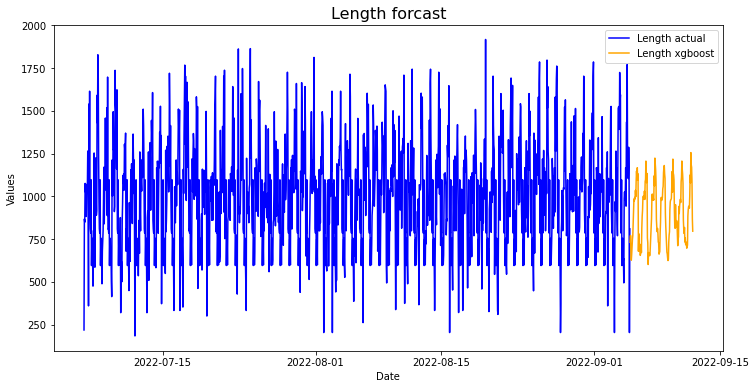

In [133]:
mvf.plot(series='Length',models='xgboost',ci=True)
plt.title('Length forcast',size=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for stacking. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


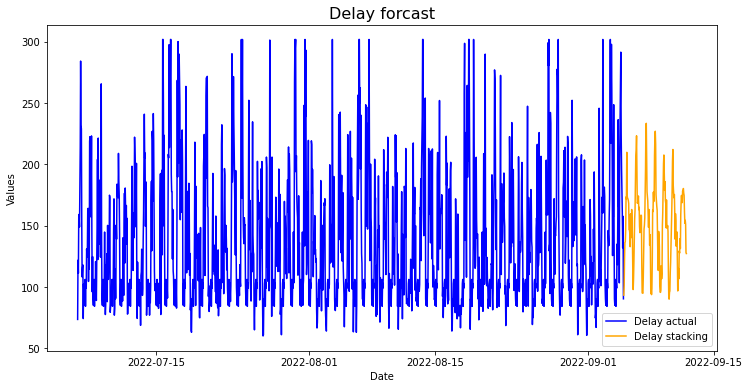

In [134]:
mvf.plot(series='Delay',models='stacking',ci=True)
plt.title('Delay forcast',size=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/scalecast/Forecaster.py:5632: Warning: Confidence intervals not found for stacking. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


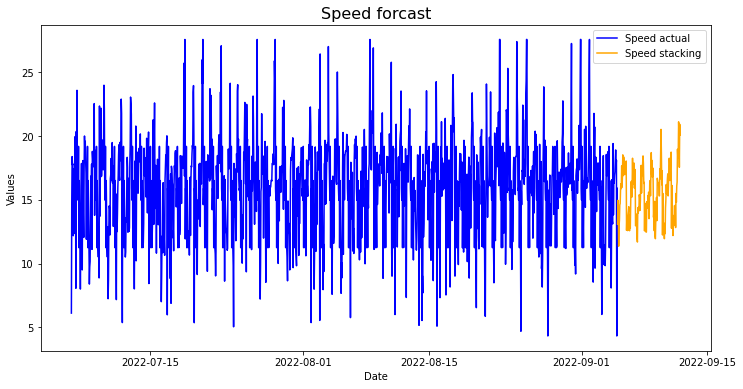

In [135]:
mvf.plot(series='Speed',models='stacking',ci=True)
plt.title('Speed forcast',size=16)
plt.show()

In [137]:
df_result = mvf.export_fitted_vals()

In [138]:
df_result.tail(3)

,DATE,Length_actuals,Length_mlr_fvs,Length_elasticnet_fvs,Length_knn_fvs,Length_rf_fvs,Length_gbt_fvs,Length_xgboost_fvs,Length_mlp_fvs,Length_stacking_fvs,...,Delay_stacking_fvs,Speed_actuals,Speed_mlr_fvs,Speed_elasticnet_fvs,Speed_knn_fvs,Speed_rf_fvs,Speed_gbt_fvs,Speed_xgboost_fvs,Speed_mlp_fvs,Speed_stacking_fvs
1442,2022-09-04 21:00:00,1168.000000,1235.506424,1244.526173,1267.673077,1009.849352,1259.296160,1201.597168,1214.283891,1202.613636,...,141.061752,18.105000,18.067058,18.039034,17.367557,15.242696,18.528280,17.823509,18.837483,18.205565
1443,2022-09-04 22:00:00,204.000000,1250.614435,1242.896951,1108.055944,1009.849352,529.756947,505.482788,1173.425336,1158.805944,...,121.790690,4.330743,19.062860,18.996250,16.461467,15.242696,9.963136,7.866285,17.521056,15.845705
1444,2022-09-04 23:00:00,810.227273,1008.205165,1001.051034,853.837413,1009.849352,782.367204,749.265991,977.352905,1045.115385,...,138.871795,15.908333,16.043270,15.921300,15.070185,15.242696,15.240379,16.343140,16.942917,17.294907


In [139]:
results = mvf.export(dfs=['model_summaries','lvl_fcsts'],to_excel=True)

In [140]:
results['lvl_fcsts']

,DATE,Length_mlp_lvl_fcst,Length_mlr_lvl_fcst,Length_elasticnet_lvl_fcst,Length_knn_lvl_fcst,Length_rf_lvl_fcst,Length_gbt_lvl_fcst,Length_xgboost_lvl_fcst,Length_stacking_lvl_fcst,Delay_mlp_lvl_fcst,...,Delay_xgboost_lvl_fcst,Delay_stacking_lvl_fcst,Speed_mlp_lvl_fcst,Speed_mlr_lvl_fcst,Speed_elasticnet_lvl_fcst,Speed_knn_lvl_fcst,Speed_rf_lvl_fcst,Speed_gbt_lvl_fcst,Speed_xgboost_lvl_fcst,Speed_stacking_lvl_fcst
0,2022-09-05 00:00:00,895.712394,828.312960,845.850231,814.806593,1009.849352,502.780927,731.809875,913.446429,85.878217,...,94.848244,93.309841,16.163630,14.183223,14.343206,15.079050,15.242696,9.829932,13.553883,13.105702
1,2022-09-05 01:00:00,898.286978,801.387393,821.016792,763.724817,1009.849352,427.942957,771.538269,806.455495,92.424096,...,104.880013,101.161550,16.366246,13.935592,13.997908,14.104370,15.242696,16.323719,15.022696,14.965192
2,2022-09-05 02:00:00,732.766533,850.272647,864.652129,735.758516,1009.849352,410.204986,671.130554,707.510256,99.822700,...,137.179184,123.777906,15.358178,14.425181,14.497799,12.554871,15.242696,12.669752,11.388396,14.057292
3,2022-09-05 03:00:00,723.429834,878.227817,890.229815,854.634158,1009.849352,389.075371,627.063843,667.185806,103.962362,...,134.655945,136.323718,13.298598,14.575652,14.629739,14.723381,15.242696,13.844111,10.311572,11.371222
4,2022-09-05 04:00:00,743.467758,915.337871,916.600494,879.096795,1009.849352,438.808971,659.967407,749.989918,109.856279,...,148.855988,136.874806,12.585468,14.668357,14.633379,13.996381,15.242696,12.990231,11.324507,12.923699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-09-11 19:00:00,1211.298430,1124.881763,1105.285337,1319.730769,1009.849352,1162.129536,1184.470093,1325.961538,150.135961,...,154.001282,151.926282,18.793617,17.432400,17.202223,19.597231,15.242696,12.924718,15.890080,21.118333
164,2022-09-11 20:00:00,1205.328128,1134.485881,1113.755862,1286.923077,1009.849352,1162.129536,1170.160889,1426.442308,122.775566,...,144.897812,154.381410,19.645796,17.566242,17.332858,19.761270,15.242696,13.178853,16.823231,20.153910
165,2022-09-11 21:00:00,1183.239526,1143.483042,1122.249814,1315.171329,1009.849352,1026.385367,1089.179077,1382.442308,98.466239,...,139.183990,151.173077,20.305826,17.689023,17.460397,20.229219,15.242696,12.382729,17.222797,17.557808
166,2022-09-11 22:00:00,1159.829349,1151.964367,1130.834366,1166.073427,1009.849352,525.253827,867.429749,1267.423077,87.831783,...,104.933586,128.076729,18.325013,17.802879,17.586014,18.953898,15.242696,9.432963,15.912233,20.929487
